Code for questions 2 and 3 inspired by code from the google drive. 

# Question 1:

In [1]:
import pandas as pd
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import pygal_maps_world.maps
from pygal.style import LightColorizedStyle, RotateStyle
import pycountry
import pickle

In [2]:
# PYTHON FUNDAMENTALS
article_df = pd.read_csv("articleInfo.csv")
author_df = pd.read_csv("authorInfo.csv")

merged_df = pd.merge(article_df, author_df, on='Article No.')
merged_df = merged_df.fillna(0)

merged_df.to_csv('merged.csv', index=False)

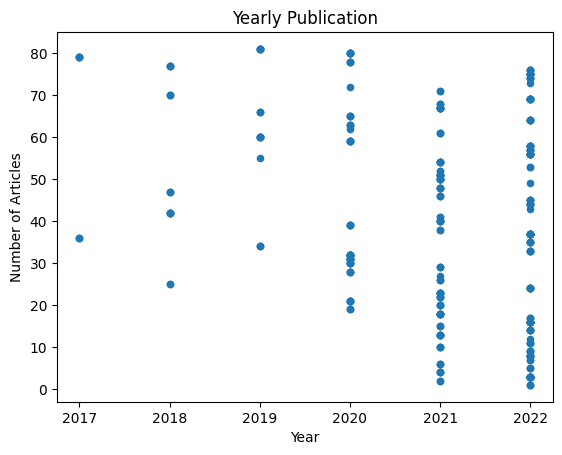

In [3]:
# 1
merged_df.plot(x='Year', y='Article No.', kind='scatter')
plt.title("Yearly Publication")
plt.xlabel("Year")
plt.ylabel("Number of Articles")
plt.show()


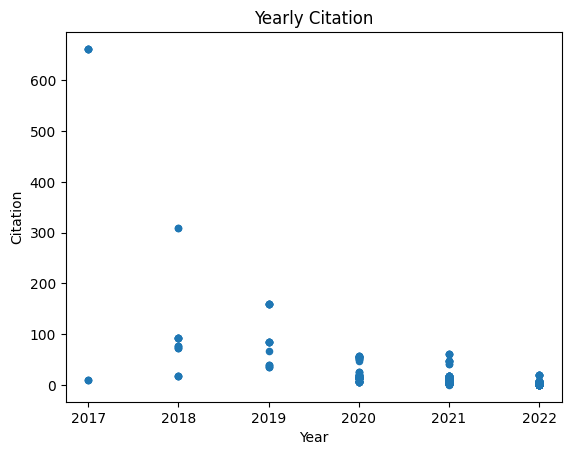

In [4]:
# 2
merged_df.plot(x='Year', y='Citation', kind='scatter')
plt.title("Yearly Citation")
plt.xlabel("Year")
plt.ylabel("Citation")
plt.show()

In [5]:
# 3
with open('dictionary.pkl', 'rb') as f:
    country_to_code = pickle.load(f)

temp_counts = merged_df['Country'].value_counts().to_dict()

counts = {}

for country, count in temp_counts.items():
    if not country:
        break
    if country == "USA":
        counts[country_to_code["United States"]] = count
    elif country == "Taiwan":
        counts[country_to_code["Taiwan (Republic of China)"]] = count
    elif country == "Russia":
        counts[country_to_code["Russian Federation"]] = count
    elif country == "Korea":
        counts[country_to_code["Korea, Republic of"]] = count
    else:
        counts[country_to_code[country]] = count


wm = pygal_maps_world.maps.World()
wm.title = "Number of Publications Across Countries"
wm.style = LightColorizedStyle
wm.add('Number of Publications', counts)

wm.render_to_file('world_map.svg')



In [6]:
# 4

print("Top 5 Institutions that have the most published articles in this area:")
instituion_counts = merged_df['Author Affiliation'].value_counts().to_dict()
instituion_counts_list = []
for instituion, counts in instituion_counts.items():
    instituion_counts_list.append([counts, instituion])

instituion_counts_list.sort(key =lambda x: x[0], reverse = True)
for i in range(5):
    print(str(i + 1) + ":" + instituion_counts_list[i][1] + ", " + str(instituion_counts_list[i][0]))


Top 5 Institutions that have the most published articles in this area:
1:University of the Western Cape, 17
2:Masaryk University, 12
3:University College Cork, 11
4:Intel Corporation, 11
5:Madigan Army Medical Center, 8


In [7]:
# 5

print("Top 5 researchers that have the most h-index in this area:")
author_idx_list = merged_df[['xAuthor Name', 'h-index']].values.tolist()

author_idx_list.sort(key =lambda x: x[1], reverse = True)
for i in range(5):
    print(str(i + 1) + ":" + author_idx_list[i][0] + ", " + str(author_idx_list[i][1]))

Top 5 researchers that have the most h-index in this area:
1:Ulrich Trautwein, 95.0
2:Nicolas Molinari, 63.0
3:George S. Athwal, 59.0
4:Maria Luisa Lorusso, 33.0
5:Vicente A. González, 33.0


# Question 2:

In [8]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df = pd.read_csv('data.csv')
# df.head(10)

In [10]:
df.isna().sum() # df.isnull().sum also return the number of missing values, you can use either of them]

Purchase        0
SUS             0
Duration        0
Gender          0
ASR_Error       0
Intent_Error    0
dtype: int64

In [11]:
df = df.fillna(0) # fill any missing values with 0

In [12]:
from sklearn.preprocessing import LabelEncoder

In [13]:
le = LabelEncoder()

le.fit(df['Purchase'])
df['Purchase'] = le.transform(df['Purchase'])

le.fit(df['Gender'])
df['Gender'] = le.transform(df['Gender'])

# df.head(10);

In [14]:
df.corr(method='pearson')['SUS'].sort_values() # pearson: standard correlation coefficient

Intent_Error   -0.693675
ASR_Error      -0.662405
Duration       -0.006631
Gender          0.111523
Purchase        0.661931
SUS             1.000000
Name: SUS, dtype: float64

In [15]:
import statsmodels.api as sm

y = df['SUS'] # dependent variable
x = df.drop(columns='SUS') # predictor variables

## (1)

In [16]:
#add constant to predictor variables
x = sm.add_constant(x)

model = sm.OLS(y, x).fit()
print(model.summary());

                            OLS Regression Results                            
Dep. Variable:                    SUS   R-squared:                       0.593
Model:                            OLS   Adj. R-squared:                  0.571
Method:                 Least Squares   F-statistic:                     27.39
Date:                Tue, 14 Feb 2023   Prob (F-statistic):           5.25e-17
Time:                        21:33:30   Log-Likelihood:                -362.39
No. Observations:                 100   AIC:                             736.8
Df Residuals:                      94   BIC:                             752.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           93.0282      5.541     16.788   

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score,mean_squared_error

In [18]:
x = df.drop(columns='SUS')
y = df['SUS']

x_train, x_test, y_train, y_test = train_test_split(x, y)

In [19]:
lr = LinearRegression().fit(x_train,y_train)

y_train_pred = lr.predict(x_train)
y_test_pred = lr.predict(x_test)

print("The R square score of linear regression model is: ", lr.score(x_test,y_test))

The R square score of linear regression model is:  0.5165820895964297


In [20]:
quad = PolynomialFeatures (degree = 2)
x_quad = quad.fit_transform(x)

X_train,X_test,Y_train,Y_test = train_test_split(x_quad,y, random_state = 0)

plr = LinearRegression().fit(X_train,Y_train)

Y_train_pred = plr.predict(X_train)
Y_test_pred = plr.predict(X_test)

print("The R square score of 2-order polynomial regression model is: ", plr.score(X_test,Y_test))

The R square score of 2-order polynomial regression model is:  0.522049850343024


# (2)
The features that seem significant are ASR_Error and Intent_Error. Not only dod they have a strong negative correlation with SUS, but they also have a p-value that is less that 0.05 making them statistically significant. On the other hand, the features: duration, gender, and purchase all have a p-value that is greater than 0.05 making them statistically insignificant.  
# (3)
The results were mostly what I expected. 

Feature: 

1. Purchase: I expected this value to be significant because I expected users that were able to use siri successfully to purchase a ticket would be more likely to rate the system higher. 

2. Gender: I did not expect this value to be significant because I did not see a reason why gender would affect the rating a user would give. 

3. Duration: I did not expect this value to be significant because having a small duration could mean separate contridictory things. For instance, the user could have had a good experience with siri and as a result of everything going right, the duration of the dialogue was short. On the other hand, it could also be the case that due to frustration with using siri, the user could have cut the dialogue short. The same goes for having a long duration since it could either indicate the user is having a good experience and thus continues the dialogue or that the user had to have a longer dialogue with siri due to ineffectiveness. 

4. Intent_Error: I expected this value to be significant because there is a direct connection between the system being ineffective and the likelines that the user reports a lower satisfaction.

5. ASR_Error: I expected this value to be significant because there is a direct connection between the system being ineffective and the likelines that the user reports a lower satisfaction.

# (4)
The model suggests that the most influential factor on SUS is the Intent_Error. Not only does Intent_Error hold statistical significance, it also has the largest coefficient (in magnitude) with a value of -2.0092. As a consequence, Intent_Error will have the greatest effect on the SUS variable.  

# (5) 
As mentioned earlier, Intent_Error and ASR_Error are significant predictors of SUS because they have a direct connection to user dissatisfaction. If the user is encountering several errors during their dialogue with siri, it is natural to expect that they will report a lower rating in the survey. 

# Question 3:

In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [22]:
df = pd.read_csv('data.csv')
df = df.drop('SUS', axis=1)


In [23]:
df.isna().sum()

Purchase        0
Duration        0
Gender          0
ASR_Error       0
Intent_Error    0
dtype: int64

In [24]:
# label
y = df['Purchase'].to_numpy()
y

array([1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1], dtype=int64)

In [25]:
# data
X = df.drop('Purchase', axis = 1).to_numpy()
X

array([[254,   0,   3,   2],
       [247,   0,   6,   9],
       [125,   1,   6,   8],
       [ 22,   0,  11,   7],
       [262,   0,   2,   3],
       [113,   1,   8,   9],
       [ 91,   1,   6,   3],
       [ 46,   0,   6,  11],
       [132,   0,   9,   9],
       [190,   0,  11,   4],
       [146,   0,   9,   7],
       [226,   0,   4,   4],
       [ 54,   1,   7,   9],
       [104,   0,   2,   3],
       [292,   0,   7,   3],
       [126,   0,   8,   9],
       [152,   1,   3,   5],
       [221,   0,   3,   4],
       [ 51,   0,   9,   9],
       [230,   0,   6,   8],
       [ 72,   1,   6,   8],
       [284,   0,   6,  11],
       [168,   0,   2,   4],
       [194,   0,   1,   3],
       [130,   1,  10,   1],
       [227,   0,   9,   3],
       [161,   1,   7,   8],
       [262,   1,   2,   3],
       [257,   1,   9,  11],
       [ 57,   1,   8,   3],
       [138,   0,   8,   9],
       [ 33,   1,   9,   4],
       [260,   0,   1,   2],
       [178,   1,   3,   4],
       [153,  

In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.model_selection import train_test_split

scale = StandardScaler()
scaled_X = scale.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size = 0.3)

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, confusion_matrix, roc_curve, auc, classification_report

import matplotlib.pyplot as plt

In [28]:
lc = LogisticRegression()
svc = SVC(probability=True)
nbc = GaussianNB()
rfc = RandomForestClassifier()

In [29]:
lc.fit(X_train, y_train)
svc.fit(X_train, y_train)
nbc.fit(X_train, y_train)
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [30]:
y_lc_predicted = lc.predict(X_test)
y_lc_pred_proba = lc.predict_proba(X_test)

y_svc_predicted = svc.predict(X_test)
y_svc_pred_proba = svc.predict_proba(X_test)

y_nbc_predicted = nbc.predict(X_test)
y_nbc_pred_proba = nbc.predict_proba(X_test)

y_rfc_predicted = rfc.predict(X_test)
y_rfc_pred_proba = rfc.predict_proba(X_test)

              precision    recall  f1-score   support

           0       0.86      0.92      0.89        13
           1       0.94      0.88      0.91        17

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30

              precision    recall  f1-score   support

           0       0.79      0.85      0.81        13
           1       0.88      0.82      0.85        17

    accuracy                           0.83        30
   macro avg       0.83      0.83      0.83        30
weighted avg       0.84      0.83      0.83        30

              precision    recall  f1-score   support

           0       0.75      0.92      0.83        13
           1       0.93      0.76      0.84        17

    accuracy                           0.83        30
   macro avg       0.84      0.84      0.83        30
weighted avg       0.85      0.83      0.83        30

              preci

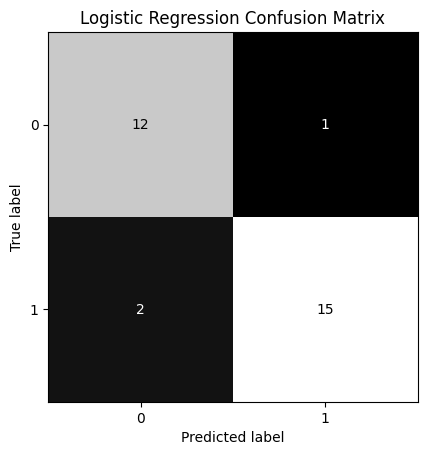

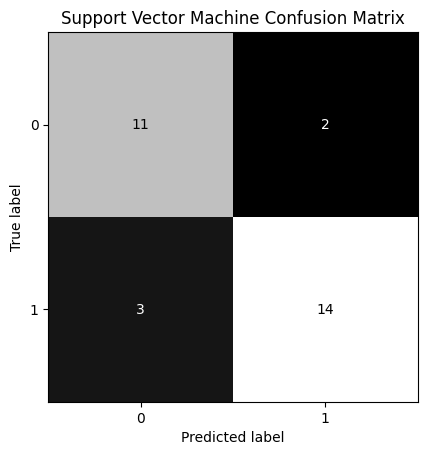

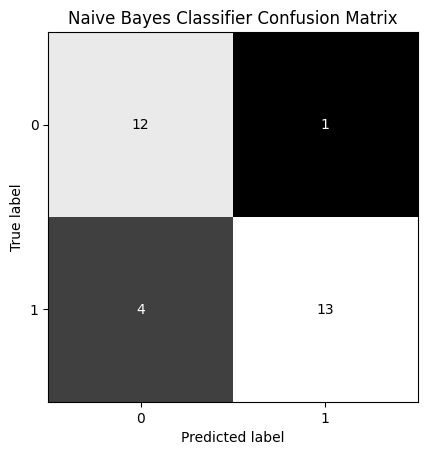

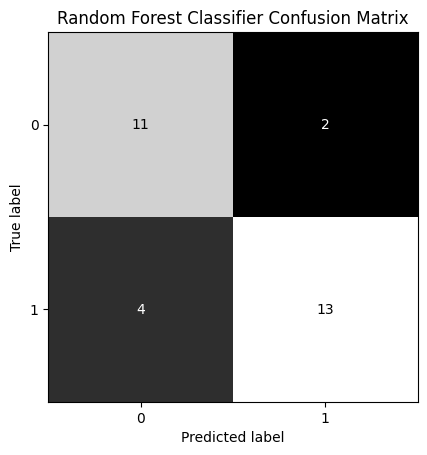

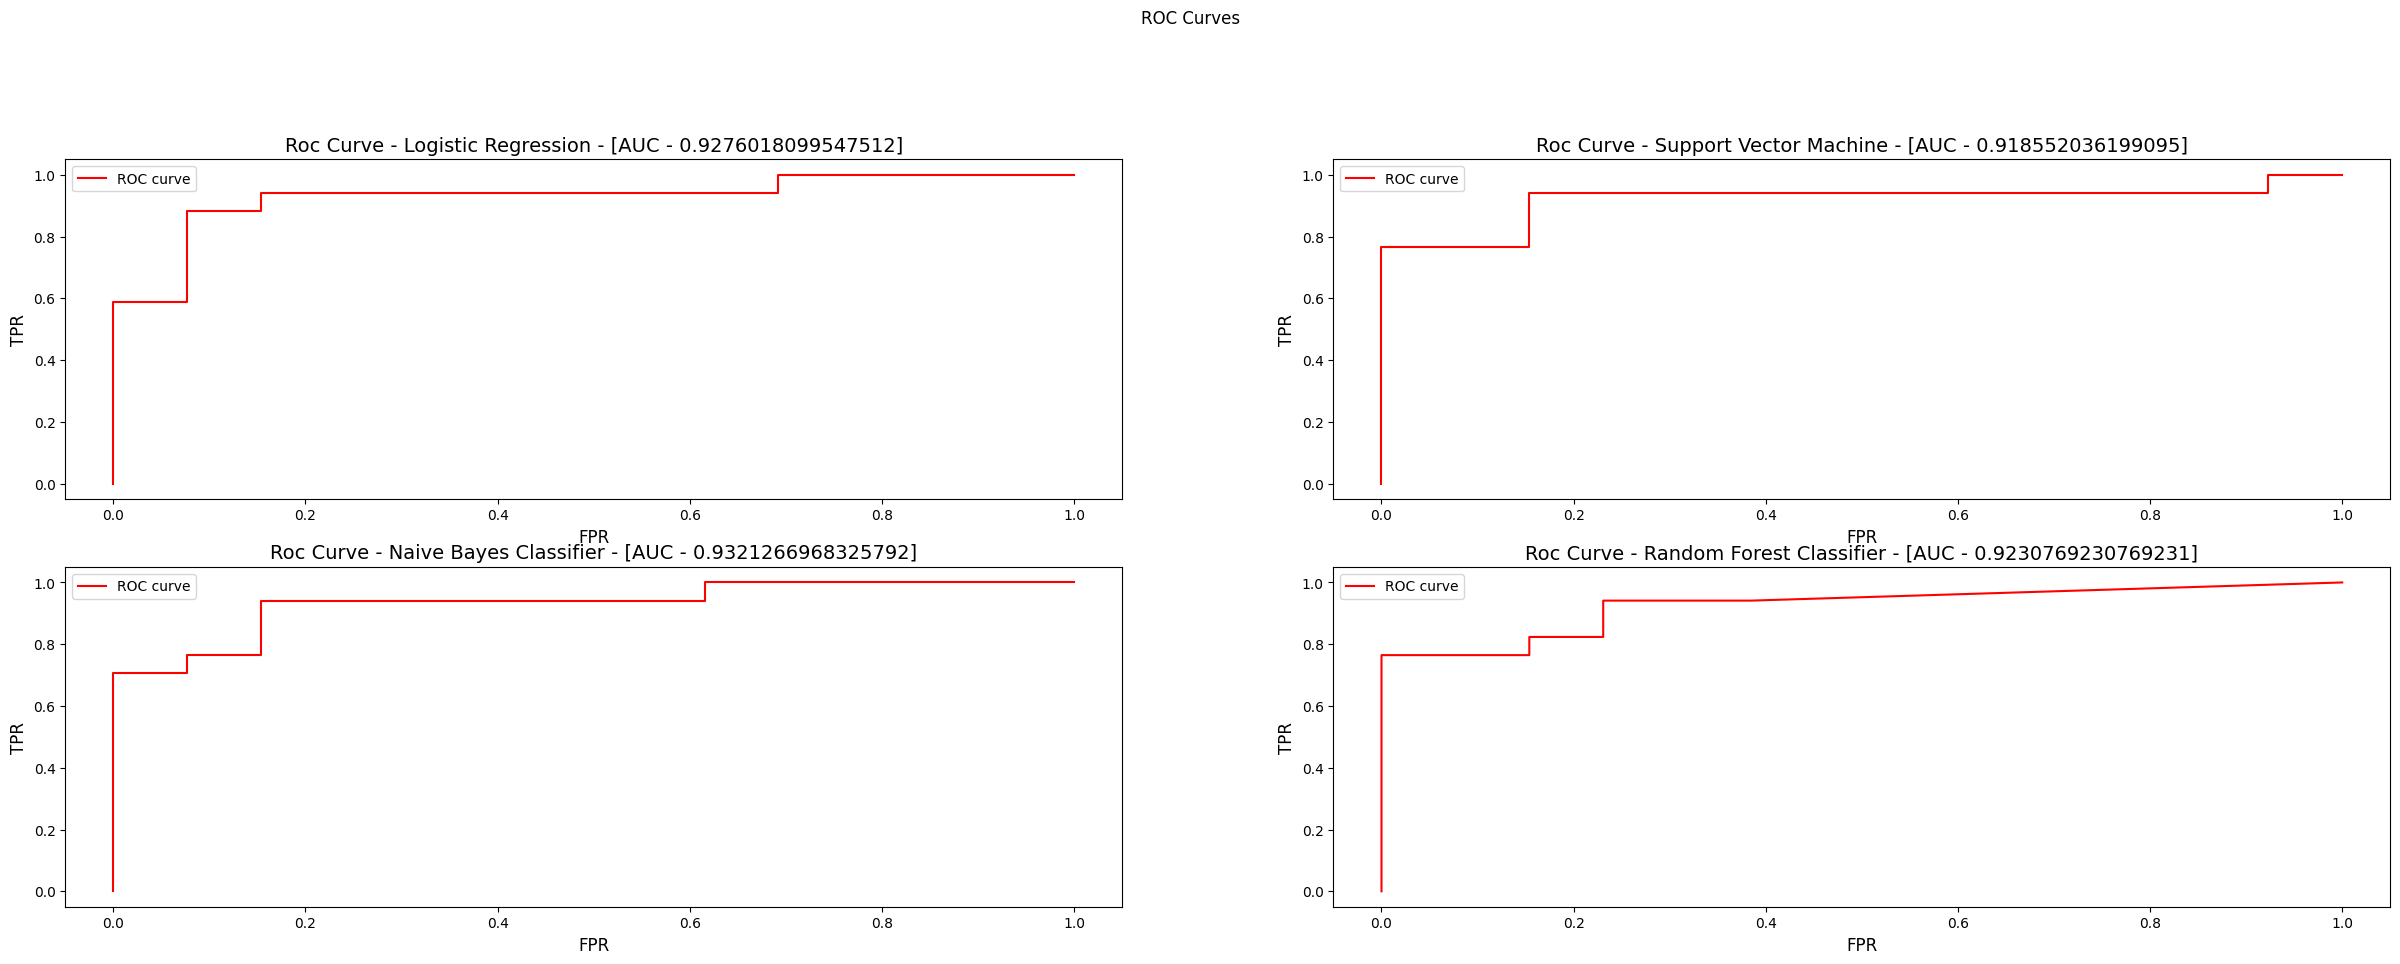

In [31]:
print(classification_report(y_test, y_lc_predicted))
print(classification_report(y_test, y_svc_predicted))
print(classification_report(y_test, y_nbc_predicted))
print(classification_report(y_test, y_rfc_predicted))

models = ['Logistic Regression', 'Support Vector Machine', 'Naive Bayes Classifier', 'Random Forest Classifier']
predictions = [y_lc_predicted, y_svc_predicted, y_nbc_predicted, y_rfc_predicted]
pred_probabilities = [y_lc_pred_proba, y_svc_pred_proba, y_nbc_pred_proba, y_rfc_pred_proba]

plot = 1

for model, prediction, pred_proba in zip(models, predictions, pred_probabilities):
    disp = ConfusionMatrixDisplay(confusion_matrix(y_test.ravel(), prediction))
    disp.plot(
        include_values=True,
        cmap='gray',
        colorbar=False
    )
    disp.ax_.set_title(f"{model} Confusion Matrix")

plt.figure(figsize=(30, 15))
plt.suptitle("ROC Curves")
plot_index = 1

for model, prediction, pred_proba in zip(models, predictions, pred_probabilities):
    fpr, tpr, thresholds = roc_curve(y_test, pred_proba[:, 1])
    auc_score = auc(fpr, tpr)
    plt.subplot(3, 2, plot_index)
    plt.plot(fpr, tpr, 'r', label='ROC curve')
    plt.title(f'Roc Curve - {model} - [AUC - {auc_score}]', fontsize=14)
    plt.xlabel('FPR', fontsize=12)
    plt.ylabel('TPR', fontsize=12)
    plt.legend()
    plot_index += 1
plt.show()

# Evaluation
All four models seem to be performing with decently high accuracy. The confusion matrix shows that each model scores higher than 0.70 in precision, recall and f1-score. More over the ROC curves demonstrate how the true positive rate is significantly higher than the false positive rate. 

In [32]:
from imblearn.over_sampling import SMOTE

In [33]:
oversample = SMOTE()
over_sampled_X_train, over_sampled_y_train = oversample.fit_resample(X_train, y_train)

In [34]:
lc = LogisticRegression()
svc = SVC(probability=True)
nbc = GaussianNB()
rfc = RandomForestClassifier()

In [35]:
lc.fit(over_sampled_X_train, over_sampled_y_train)
svc.fit(over_sampled_X_train, over_sampled_y_train)
nbc.fit(over_sampled_X_train, over_sampled_y_train)
rfc.fit(over_sampled_X_train, over_sampled_y_train)

RandomForestClassifier()

In [36]:
y_lc_predicted = lc.predict(X_test)
y_lc_pred_proba = lc.predict_proba(X_test)

y_svc_predicted = svc.predict(X_test)
y_svc_pred_proba = svc.predict_proba(X_test)

y_nbc_predicted = nbc.predict(X_test)
y_nbc_pred_proba = nbc.predict_proba(X_test)

y_rfc_predicted = rfc.predict(X_test)
y_rfc_pred_proba = rfc.predict_proba(X_test)

print(classification_report(y_test, y_lc_predicted))
print(classification_report(y_test, y_svc_predicted))
print(classification_report(y_test, y_nbc_predicted))
print(classification_report(y_test, y_rfc_predicted))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85        13
           1       0.88      0.88      0.88        17

    accuracy                           0.87        30
   macro avg       0.86      0.86      0.86        30
weighted avg       0.87      0.87      0.87        30

              precision    recall  f1-score   support

           0       0.79      0.85      0.81        13
           1       0.88      0.82      0.85        17

    accuracy                           0.83        30
   macro avg       0.83      0.83      0.83        30
weighted avg       0.84      0.83      0.83        30

              precision    recall  f1-score   support

           0       0.75      0.92      0.83        13
           1       0.93      0.76      0.84        17

    accuracy                           0.83        30
   macro avg       0.84      0.84      0.83        30
weighted avg       0.85      0.83      0.83        30

              preci

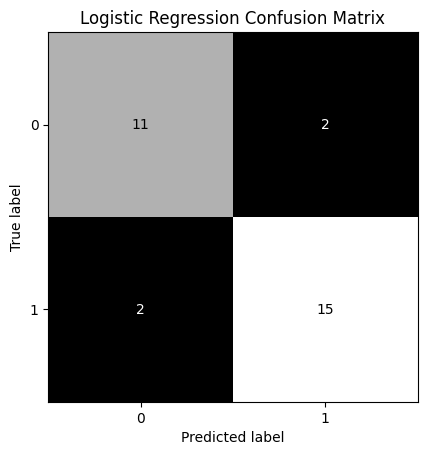

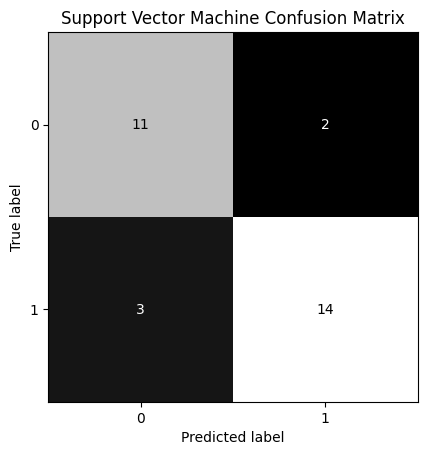

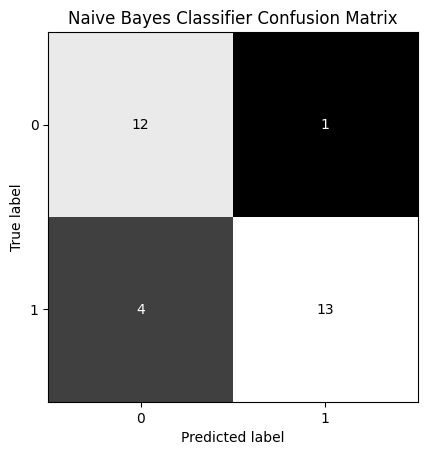

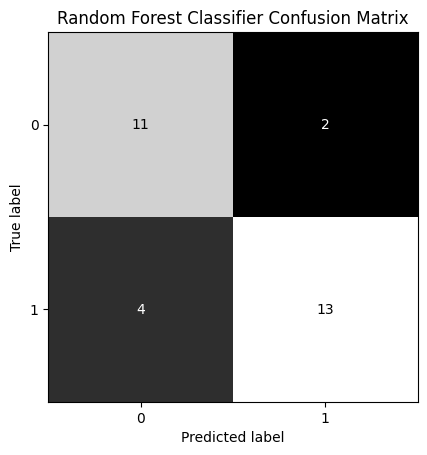

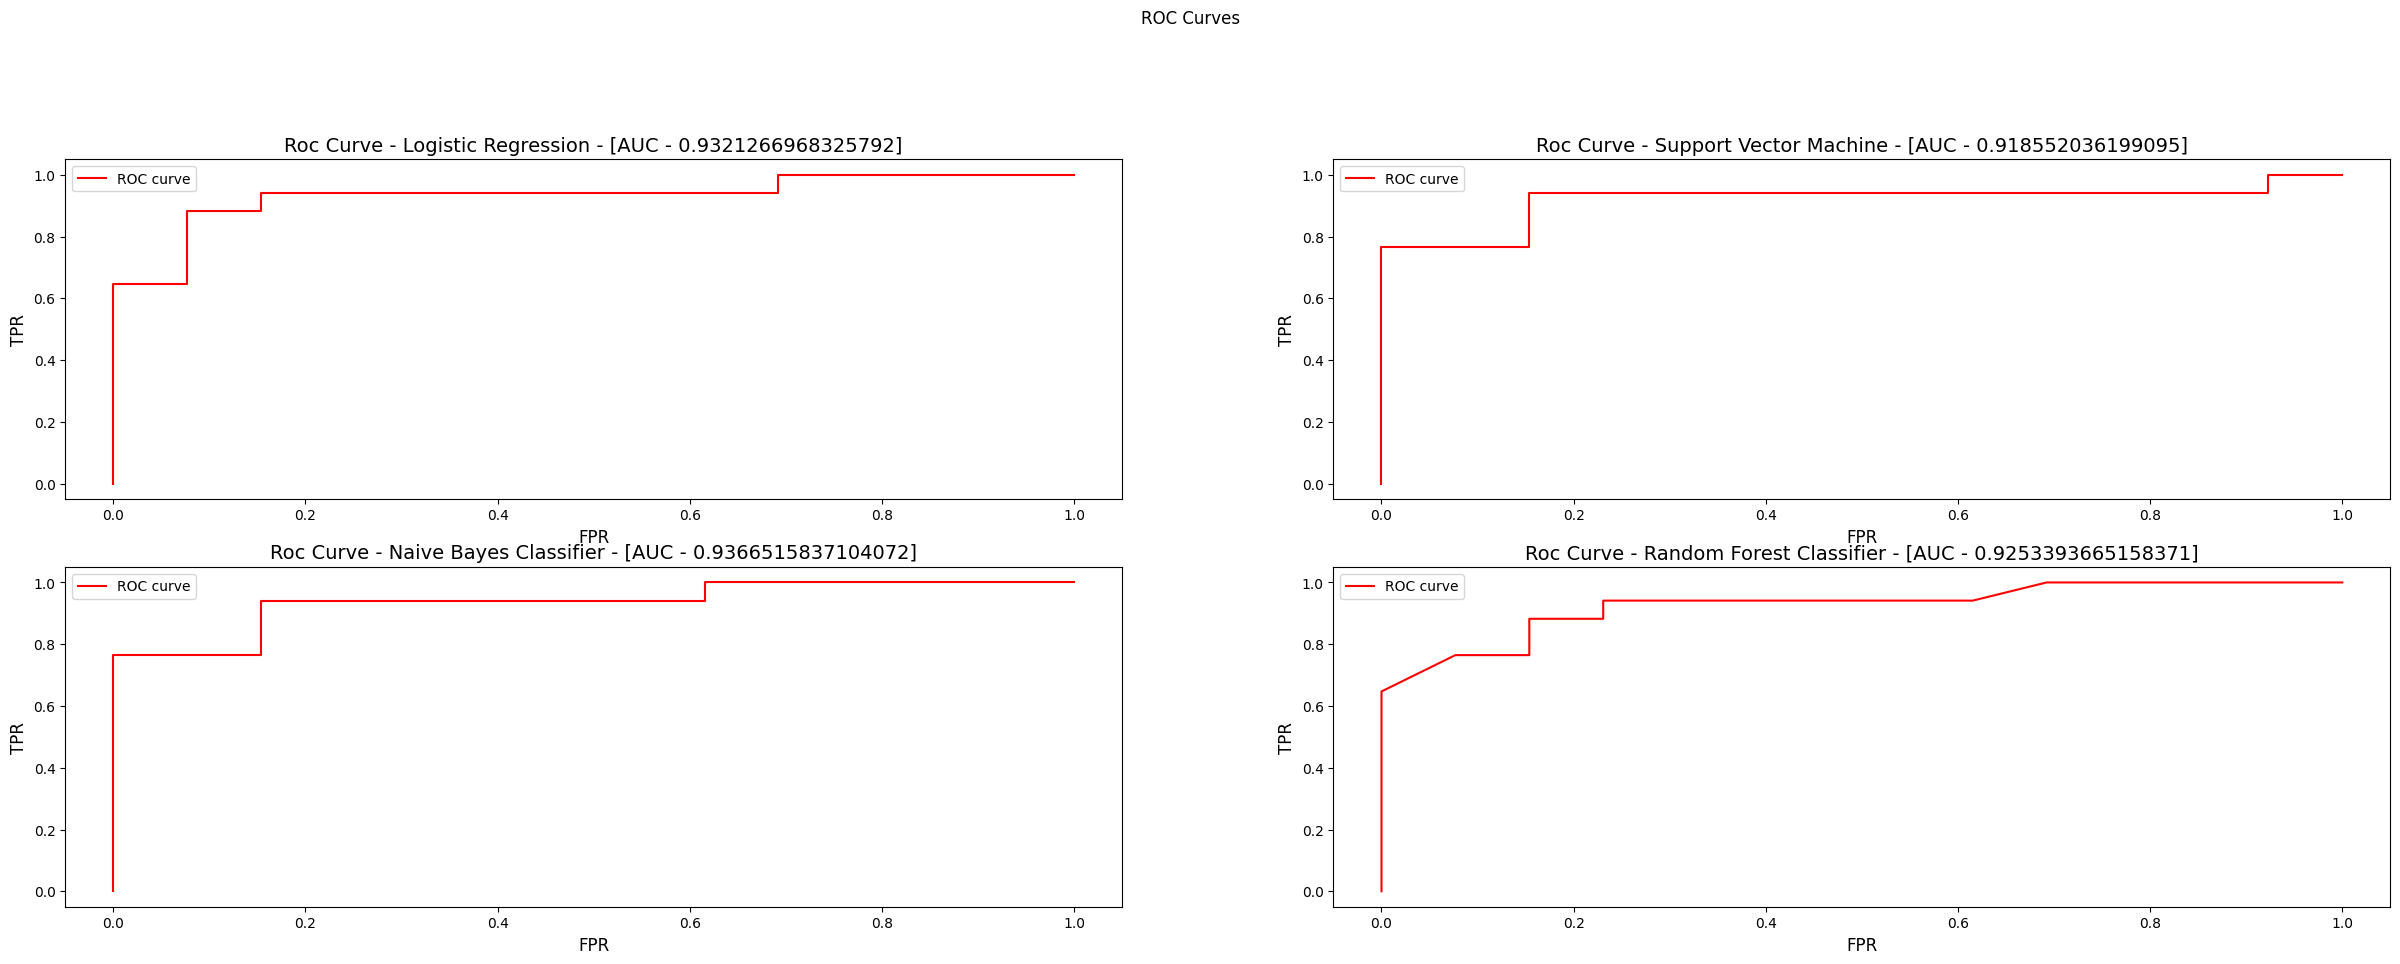

In [37]:
models = ['Logistic Regression', 'Support Vector Machine', 'Naive Bayes Classifier', 'Random Forest Classifier']
predictions = [y_lc_predicted, y_svc_predicted, y_nbc_predicted, y_rfc_predicted]
pred_probabilities = [y_lc_pred_proba, y_svc_pred_proba, y_nbc_pred_proba, y_rfc_pred_proba]

plot = 1

for model, prediction, pred_proba in zip(models, predictions, pred_probabilities):
    disp = ConfusionMatrixDisplay(confusion_matrix(y_test.ravel(), prediction))
    disp.plot(
        include_values=True,
        cmap='gray',
        colorbar=False
    )
    disp.ax_.set_title(f"{model} Confusion Matrix")

plt.figure(figsize=(30, 15))
plt.suptitle("ROC Curves")
plot_index = 1

for model, prediction, pred_proba in zip(models, predictions, pred_probabilities):
    fpr, tpr, thresholds = roc_curve(y_test, pred_proba[:, 1])
    auc_score = auc(fpr, tpr)
    plt.subplot(3, 2, plot_index)
    plt.plot(fpr, tpr, 'r', label='ROC curve')
    # pyplot.figure(figsize=(5, 5))
    plt.title(f'Roc Curve - {model} - [AUC - {auc_score}]', fontsize=14)
    plt.xlabel('FPR', fontsize=12)
    plt.ylabel('TPR', fontsize=12)
    plt.legend()
    plot_index += 1
plt.show()